In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import euclidean_distances

# clustering libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# alternative scipy implementation for clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# for scaling numpy array
from sklearn.preprocessing import StandardScaler

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit

C:\Users\MucahitCevik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def PrintDistMat(gDistMat):
    for i in range(len(gDistMat)):
        for j in range(len(gDistMat[0])):
            sys.stdout.write(str(givenDec(gDistMat[i][j])) + '\t')
        sys.stdout.write('\n')

#### data generation/import

In [6]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# cc = 0
# for val in X:
#     print(str(y_true[cc]) + '\t' + str(val))
#     cc = cc + 1

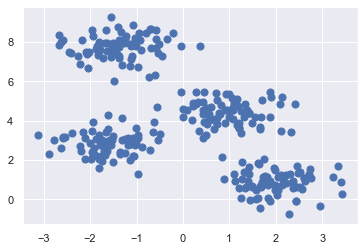

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=50) # s=50 is size of the blobs

## K-means clustering

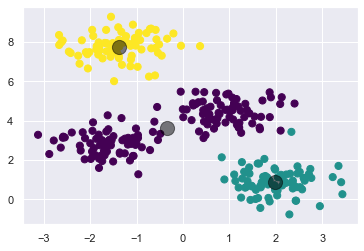

In [5]:
kmeans = KMeans(n_clusters=3) # from sklearn
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

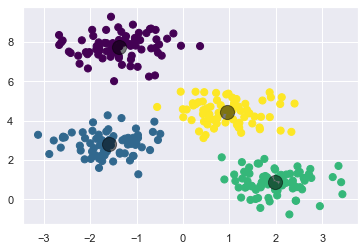

In [6]:
kmeans = KMeans(n_clusters=4) # from sklearn
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Hierarchical clustering

In [7]:
hc = AgglomerativeClustering(n_clusters=4) # from sklearn
hc.fit(X)
#y_hc = hierarchical.labels_
y_hc = hc.fit_predict(X)
y_hc

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3], d

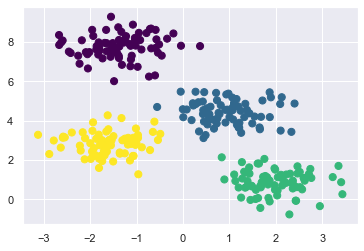

In [8]:
# hierarchical clustering results
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')

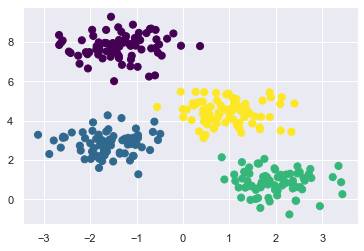

In [9]:
# kmeans clustering results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

### scipy implementation for hierarchical clustering

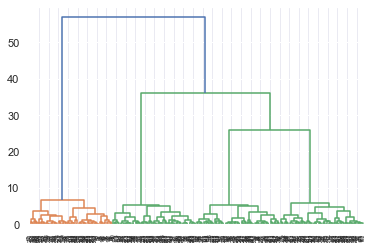

In [10]:
link_c = linkage(X, method='ward')
plt.figure()
dendrogram(link_c)
plt.show()

clusters:	[1 2 3 4]


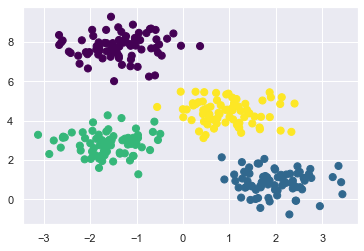

In [11]:
max_d = 7 # max_distance btw clusters
link_clusters = fcluster(link_c, max_d, criterion='distance')
print("clusters:" + '\t' + str(np.unique(link_clusters)))

plt.scatter(X[:, 0], X[:, 1], c=link_clusters, s=50, cmap='viridis')

clusters:	[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


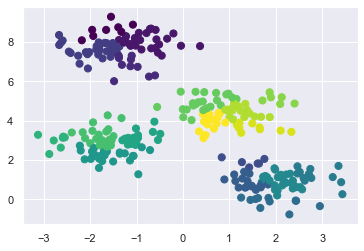

In [12]:
max_d = 3 # max_distance btw clusters
link_clusters = fcluster(link_c, max_d, criterion='distance')
print("clusters:" + '\t' + str(np.unique(link_clusters)))

plt.scatter(X[:, 0], X[:, 1], c=link_clusters, s=50, cmap='viridis')

## Normalizing the data

In [10]:
X = np.array([[1.0,2.0,100.0],[4.0,1.0,75.0],[2.0,1.0,40.0]]) # float for preventing StandardScaler() varnings
print(X)
#print(round(X.mean(),3))

[[  1.   2. 100.]
 [  4.   1.  75.]
 [  2.   1.  40.]]


In [11]:
# pt1:[1,2,100], pt2:[4,3,50] -> euclidean distance is 50.1
np.around(euclidean_distances(X), 2)

array([[ 0.  , 25.2 , 60.02],
       [25.2 ,  0.  , 35.06],
       [60.02, 35.06,  0.  ]])

- standard scaler magic: Standardize features by removing the mean and scaling to unit variance
- StandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have mean = 0 and standard deviation = 1.
>- mean: $\mu = \frac{1}{n} \sum_{i=1}^n x_i$
>- stdev: $\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu_i)^2}$
>- standardization: $z = \frac{x-\mu}{\sigma}$

In [12]:
# after standardization, each column will have a mean 0, variance 1
np.around(StandardScaler().fit_transform(X),2)

array([[-1.07,  1.41,  1.15],
       [ 1.34, -0.71,  0.14],
       [-0.27, -0.71, -1.29]])

In [13]:
np.around(euclidean_distances(StandardScaler().fit_transform(X)), 2)

array([[0.  , 3.36, 3.33],
       [3.36, 0.  , 2.14],
       [3.33, 2.14, 0.  ]])

Note: Whether normalization is required or not may depend on the distance metric you choose.

## Clustering over pandas dataframe

In [14]:
pd.set_option('display.max_columns', None)  
my_data = pd.read_csv('universities.csv')
my_data.set_index('School', inplace=True) # set column as index

In [15]:
#my_data.head()
my_data
#pd.options.display.max_rows

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent
School,,,,,,
Amherst,LibArts,1315,0.22,26636,0.85,0.93
Barnard,LibArts,1220,0.53,17653,0.69,0.80
Bates,LibArts,1240,0.36,17554,0.58,0.88
Berkeley,University,1176,0.37,23665,0.95,0.68
Bowdoin,LibArts,1300,0.24,25703,0.78,0.90
Brown,University,1281,0.24,24201,0.80,0.90
ByrnMawr,LibArts,1255,0.56,18847,0.70,0.84
CalTech,University,1400,0.31,102262,0.98,0.75
UCLA,University,1142,0.43,26859,0.96,0.61


In [16]:
# convert categorical data to numerical
my_data["Type"] = my_data["Type"].astype("category").cat.codes

In [17]:
my_data.head()

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent
School,,,,,,
Amherst,0,1315,0.22,26636,0.85,0.93
Barnard,0,1220,0.53,17653,0.69,0.80
Bates,0,1240,0.36,17554,0.58,0.88
Berkeley,1,1176,0.37,23665,0.95,0.68
Bowdoin,0,1300,0.24,25703,0.78,0.90


In [18]:
mat = my_data.values # convert dataframe to matrix
mat

array([[0.00000e+00, 1.31500e+03, 2.20000e-01, 2.66360e+04, 8.50000e-01,
        9.30000e-01],
       [0.00000e+00, 1.22000e+03, 5.30000e-01, 1.76530e+04, 6.90000e-01,
        8.00000e-01],
       [0.00000e+00, 1.24000e+03, 3.60000e-01, 1.75540e+04, 5.80000e-01,
        8.80000e-01],
       [1.00000e+00, 1.17600e+03, 3.70000e-01, 2.36650e+04, 9.50000e-01,
        6.80000e-01],
       [0.00000e+00, 1.30000e+03, 2.40000e-01, 2.57030e+04, 7.80000e-01,
        9.00000e-01],
       [1.00000e+00, 1.28100e+03, 2.40000e-01, 2.42010e+04, 8.00000e-01,
        9.00000e-01],
       [0.00000e+00, 1.25500e+03, 5.60000e-01, 1.88470e+04, 7.00000e-01,
        8.40000e-01],
       [1.00000e+00, 1.40000e+03, 3.10000e-01, 1.02262e+05, 9.80000e-01,
        7.50000e-01],
       [1.00000e+00, 1.14200e+03, 4.30000e-01, 2.68590e+04, 9.60000e-01,
        6.10000e-01],
       [1.00000e+00, 1.10900e+03, 3.20000e-01, 1.96840e+04, 8.20000e-01,
        7.30000e-01]])

In [19]:
dist_mat = euclidean_distances(mat)
PrintDistMat(dist_mat)

0.0	8983.5	9082.3	2974.3	933.1	2435.2	7789.2	75626.0	282.2	6955.1	
8983.5	0.0	101.0	6012.2	8050.4	6548.3	1194.5	84609.2	9206.3	2034.0	
9082.3	101.0	0.0	6111.3	8149.2	6647.1	1293.1	84708.2	9305.5	2134.0	
2974.3	6012.2	6111.3	0.0	2041.8	546.2	4818.6	78597.3	3194.2	3981.6	
933.1	8050.4	8149.2	2041.8	0.0	1502.1	6856.1	76559.1	1166.7	6022.0	
2435.2	6548.3	6647.1	546.2	1502.1	0.0	5354.1	78061.1	2661.6	4520.3	
7789.2	1194.5	1293.1	4818.6	6856.1	5354.1	0.0	83415.1	8012.8	849.6	
75626.0	84609.2	84708.2	78597.3	76559.1	78061.1	83415.1	0.0	75403.4	82578.5	
282.2	9206.3	9305.5	3194.2	1166.7	2661.6	8012.8	75403.4	0.0	7175.1	
6955.1	2034.0	2134.0	3981.6	6022.0	4520.3	849.6	82578.5	7175.1	0.0	


Standardizing data is recommended because otherwise the range of values in each feature will act as a weight when determining how to cluster data, which is typically undesired.

In [20]:
norm_mat = StandardScaler().fit_transform(mat)
norm_mat

array([[-1.        ,  0.864396  , -1.22764918, -0.15146233,  0.31520362,
         1.26269343],
       [-1.        , -0.28894136,  1.53011347, -0.52215384, -0.97793943,
        -0.01972958],
       [-1.        , -0.04613349,  0.01779202, -0.52623916, -1.86697528,
         0.76945381],
       [ 1.        , -0.82311866,  0.1067521 , -0.2740633 ,  1.12341803,
        -1.20350468],
       [-1.        ,  0.6822901 , -1.04972901, -0.18996341, -0.25054647,
         0.96674966],
       [ 1.        ,  0.45162263, -1.04972901, -0.25194478, -0.08890358,
         0.96674966],
       [-1.        ,  0.1359724 ,  1.79699373, -0.47288236, -0.89711799,
         0.37486211],
       [ 1.        ,  1.89632943, -0.42700841,  2.96931202,  1.36588235,
        -0.51296921],
       [ 1.        , -1.23589203,  0.64051262, -0.14226004,  1.20423947,
        -1.89404015],
       [ 1.        , -1.63652501, -0.33804832, -0.43834281,  0.0727393 ,
        -0.71026506]])

In [21]:
dist_mat_norm = euclidean_distances(norm_mat)
PrintDistMat(dist_mat_norm)

0.0	3.5	2.7	3.9	0.7	2.1	3.5	4.4	4.8	3.9	
3.5	0.0	1.9	3.5	3.0	3.6	0.6	5.5	3.8	3.3	
2.7	1.9	0.0	4.2	2.1	2.9	2.1	5.7	4.7	3.6	
3.9	3.5	4.2	0.0	3.8	3.0	3.8	4.3	1.0	1.5	
0.7	3.0	2.1	3.8	0.0	2.0	3.0	4.5	4.6	3.6	
2.1	3.6	2.9	3.0	2.0	0.0	3.6	4.1	3.9	2.8	
3.5	0.6	2.1	3.8	3.0	3.6	0.0	5.5	4.1	3.7	
4.4	5.5	5.7	4.3	4.5	4.1	5.5	0.0	4.8	5.1	
4.8	3.8	4.7	1.0	4.6	3.9	4.1	4.8	0.0	2.0	
3.9	3.3	3.6	1.5	3.6	2.8	3.7	5.1	2.0	0.0	


#### kmeans clustering results

In [22]:
km = sklearn.cluster.KMeans(n_clusters=4, init='random', n_init=1, verbose=0)
km.fit(mat)

KMeans(init='random', n_clusters=4, n_init=1)

In [23]:
# Get cluster assignment labels
labels = km.labels_
labels

array([0, 3, 3, 0, 0, 0, 1, 2, 0, 1])

In [24]:
# Format results as a DataFrame
results = pd.DataFrame([my_data.index,labels]).T
results

,0,1
0,Amherst,0
1,Barnard,3
2,Bates,3
3,Berkeley,0
4,Bowdoin,0
5,Brown,0
6,ByrnMawr,1
7,CalTech,2
8,UCLA,0
9,UNC,1


In [25]:
# add cluster ids as another column
my_data["cluster"] = labels
my_data

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent,cluster
School,,,,,,,
Amherst,0,1315,0.22,26636,0.85,0.93,0
Barnard,0,1220,0.53,17653,0.69,0.80,3
Bates,0,1240,0.36,17554,0.58,0.88,3
Berkeley,1,1176,0.37,23665,0.95,0.68,0
Bowdoin,0,1300,0.24,25703,0.78,0.90,0
Brown,1,1281,0.24,24201,0.80,0.90,0
ByrnMawr,0,1255,0.56,18847,0.70,0.84,1
CalTech,1,1400,0.31,102262,0.98,0.75,2
UCLA,1,1142,0.43,26859,0.96,0.61,0


In [26]:
my_data[my_data["cluster"]==0]

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent,cluster
School,,,,,,,
Amherst,0,1315,0.22,26636,0.85,0.93,0
Berkeley,1,1176,0.37,23665,0.95,0.68,0
Bowdoin,0,1300,0.24,25703,0.78,0.90,0
Brown,1,1281,0.24,24201,0.80,0.90,0
UCLA,1,1142,0.43,26859,0.96,0.61,0


In [27]:
my_data[my_data["cluster"]==1]

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent,cluster
School,,,,,,,
ByrnMawr,0,1255,0.56,18847,0.70,0.84,1
UNC,1,1109,0.32,19684,0.82,0.73,1


In [28]:
my_data[my_data["cluster"]==2]

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent,cluster
School,,,,,,,
CalTech,1,1400,0.31,102262,0.98,0.75,2


In [29]:
my_data[my_data["cluster"]==3]

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent,cluster
School,,,,,,,
Barnard,0,1220,0.53,17653,0.69,0.80,3
Bates,0,1240,0.36,17554,0.58,0.88,3


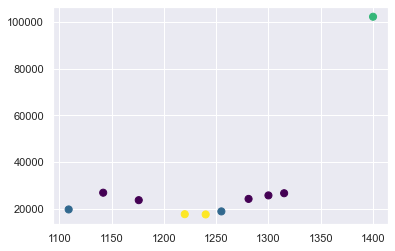

In [30]:
plt.scatter(my_data["MedianSAT"], my_data["ExpendituresPerStudent"], c=labels, s=50, cmap='viridis')

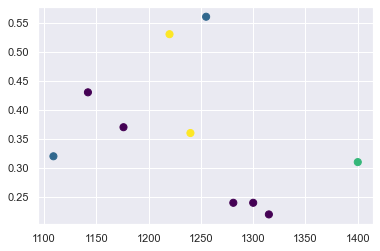

In [31]:
plt.scatter(my_data["MedianSAT"], my_data["AcceptanceRate"], c=labels, s=50, cmap='viridis')

#### hierarchical clustering results

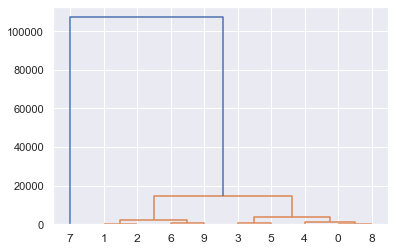

In [32]:
link_c = linkage(mat, method='ward')
plt.figure()
dendrogram(link_c)
plt.show()

#### hierarchical clustering results - normalized data

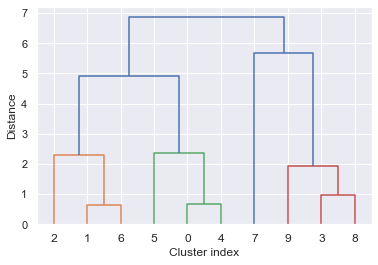

In [33]:
link_c = linkage(norm_mat, method='ward')
plt.figure()
plt.xlabel('Cluster index')# (suppressed)')
plt.ylabel('Distance')
dendrogram(link_c,
           #no_labels = True, # if true, do not print leaf labels
           #p=4,
           #truncate_mode='lastp',  # show only the last p merged clusters
           #show_contracted=True,  # to get a distribution impression in truncated branches
          )
plt.show()

In [34]:
hc = AgglomerativeClustering(n_clusters=4)
hc.fit(norm_mat)
#y_hc = hierarchical.labels_
y_hc = hc.fit_predict(norm_mat)
y_hc

array([0, 1, 1, 3, 0, 0, 1, 2, 3, 3], dtype=int64)

In [35]:
my_data["cluster"] = y_hc
my_data

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent,cluster
School,,,,,,,
Amherst,0,1315,0.22,26636,0.85,0.93,0
Barnard,0,1220,0.53,17653,0.69,0.80,1
Bates,0,1240,0.36,17554,0.58,0.88,1
Berkeley,1,1176,0.37,23665,0.95,0.68,3
Bowdoin,0,1300,0.24,25703,0.78,0.90,0
Brown,1,1281,0.24,24201,0.80,0.90,0
ByrnMawr,0,1255,0.56,18847,0.70,0.84,1
CalTech,1,1400,0.31,102262,0.98,0.75,2
UCLA,1,1142,0.43,26859,0.96,0.61,3


In [36]:
my_data[my_data["cluster"]==3]

,Type,MedianSAT,AcceptanceRate,ExpendituresPerStudent,Top10Percent_HS,Graduation_percent,cluster
School,,,,,,,
Berkeley,1,1176,0.37,23665,0.95,0.68,3
UCLA,1,1142,0.43,26859,0.96,0.61,3
UNC,1,1109,0.32,19684,0.82,0.73,3


## Gaussian Mixture Models

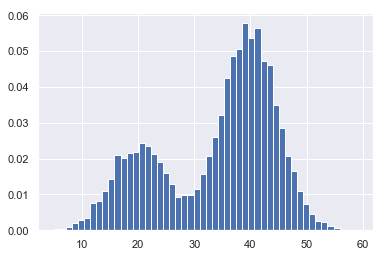

In [ ]:
# example of a bimodal constructed from two gaussian processes
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot
# generate a sample
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))

#X3 = normal(loc=60, scale=5, size=2000)
#X = hstack((X1, X2, X3))
# plot the histogram
pyplot.hist(X, bins=50, density=True)
pyplot.show()

We can model the problem of estimating the density of this dataset using a Gaussian Mixture Model.
- The GaussianMixture scikit-learn class can be used to model this problem and estimate the parameters of the distributions using the expectation-maximization algorithm.

We can estimate the latent variable for the points in the training dataset and we would expect the first 3,000 points to belong to one process (e.g. value=1) and the next 7,000 data points to belong to a different process (e.g. value=0).

- Your specific results may vary given the stochastic nature of the learning algorithm.

- In this case, we can see that at least for the first few and last few examples in the dataset, that the model mostly predicts the correct value for the latent variable. It’s a generally challenging problem and it is expected that the points between the peaks of the distribution will remain ambiguous and assigned to one process or another holistically

In [ ]:
# example of fitting a gaussian mixture model with expectation maximization
from numpy import hstack
from numpy.random import normal
from sklearn.mixture import GaussianMixture

# generate a sample
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))

# reshape into a table with one column
X = X.reshape((len(X), 1))

# fit model
model = GaussianMixture(n_components=2, init_params='random')
model.fit(X)

# predict latent values
yhat = model.predict(X)

# check latent value for first few points
print(yhat[:100])

# check latent value for last few points
print(yhat[-100:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1]
